## Investigating T>A /A > T patterns flanked by T and A

In this script, we go back to the analysis of the Lindo et al 2016 data on 25 ancients anf 25 moderns where in a couple of ancient samples, we saw a large number of AA (T->A) AA and TT (A->T) TT patterns. These were just one pattern that seemed very dominant. We also dominance of other patterns of (T->A) flanked by T and A, and (A->T) flanked by Ts and As. 

Here the main goal is 

- Invetigate if these patterns show up in other data (Gossling et al, Sherpa, HGDP moderns, 1000 Genomes)
- Can we say if this pattern is part of evolutionary history?
- Can we say if they are a type of environmental damage?

In [18]:
options(warn=-1)
library(aRchaic)
library(CountClust)
library(maptpx)
library(grid)
library(gridBase)
library(plyr)
library(dplyr)

In [3]:
## Load signature data from different ancient DNA data sources

lindoancient_data <- get(load("../processed_data/lindo2016ancients-counts-table.rda"))
lindomoderns_data <- get(load("../processed_data/lindo2016moderns-counts-table.rda"))
sardinia_data <- get(load("../processed_data/sardinia2017.rda"))
sherpa_data <- get(load("../processed_data/sherpa2017.rda"))
hgdp_data <- get(load("../processed_data/HGDPmoderns-counts-table.rda"))
gossling_data <- get(load("../processed_data/annagosling2016-counts-table.rda"))

## club the signatures for each BAM file signature data 

lindoancient_data_clubbed <- club_signature_counts(lindoancient_data)
lindomoderns_data_clubbed <- club_signature_counts(lindomoderns_data)
sardinia_data_clubbed <- club_signature_counts(sardinia_data)
sherpa_data_clubbed <- club_signature_counts(sherpa_data)
hgdp_data_clubbed <- club_signature_counts(hgdp_data)
gossling_data_clubbed <- club_signature_counts(gossling_data)
thousandg_data_clubbed <- get(load("../processed_data/1000Gmoderns-clubbed_counts-table.rda"));

## Filter the signatures so as to ignore the position information of the mutational pattern 

lindoancient_data_filtered <- filter_signatures_wo_location(lindoancient_data_clubbed)
lindomoderns_data_filtered <- filter_signatures_wo_location(lindomoderns_data_clubbed)
sardinia_data_filtered <- filter_signatures_wo_location(sardinia_data_clubbed)
sherpa_data_filtered <- filter_signatures_wo_location(sherpa_data_clubbed)
thousandg_data_filtered <- filter_signatures_wo_location(thousandg_data_clubbed)
hgdp_data_filtered <- filter_signatures_wo_location(hgdp_data_clubbed)
gossling_data_filtered <- filter_signatures_wo_location(gossling_data_clubbed)

## Analyzing (T->A)AA patterns 

We here analyze the (T->A) AA patterns in the different populations.

In [4]:
sig_T_AAA_counts <- c();
sig_T_AAA_counts <- c(sig_T_AAA_counts, rowSums(lindoancient_data_filtered[,grep("T->AAA", colnames(lindoancient_data_filtered))])/ rowSums(lindoancient_data_filtered))
sig_T_AAA_counts <- c(sig_T_AAA_counts, rowSums(lindomoderns_data_filtered[,grep("T->AAA", colnames(lindomoderns_data_filtered))])/ rowSums(lindomoderns_data_filtered))
sig_T_AAA_counts <- c(sig_T_AAA_counts, rowSums(sardinia_data_filtered[,grep("T->AAA", colnames(sardinia_data_filtered))])/ rowSums(sardinia_data_filtered))
sig_T_AAA_counts <- c(sig_T_AAA_counts, rowSums(sherpa_data_filtered[,grep("T->AAA", colnames(sherpa_data_filtered))])/ rowSums(sherpa_data_filtered))
sig_T_AAA_counts <- c(sig_T_AAA_counts, rowSums(thousandg_data_filtered[,grep("T->AAA", colnames(thousandg_data_filtered))])/ rowSums(thousandg_data_filtered))
sig_T_AAA_counts <- c(sig_T_AAA_counts, rowSums(hgdp_data_filtered[,grep("T->AAA", colnames(hgdp_data_filtered))])/ rowSums(hgdp_data_filtered))
sig_T_AAA_counts <- c(sig_T_AAA_counts, rowSums(gossling_data_filtered[,grep("T->AAA", colnames(gossling_data_filtered))])/ rowSums(gossling_data_filtered))

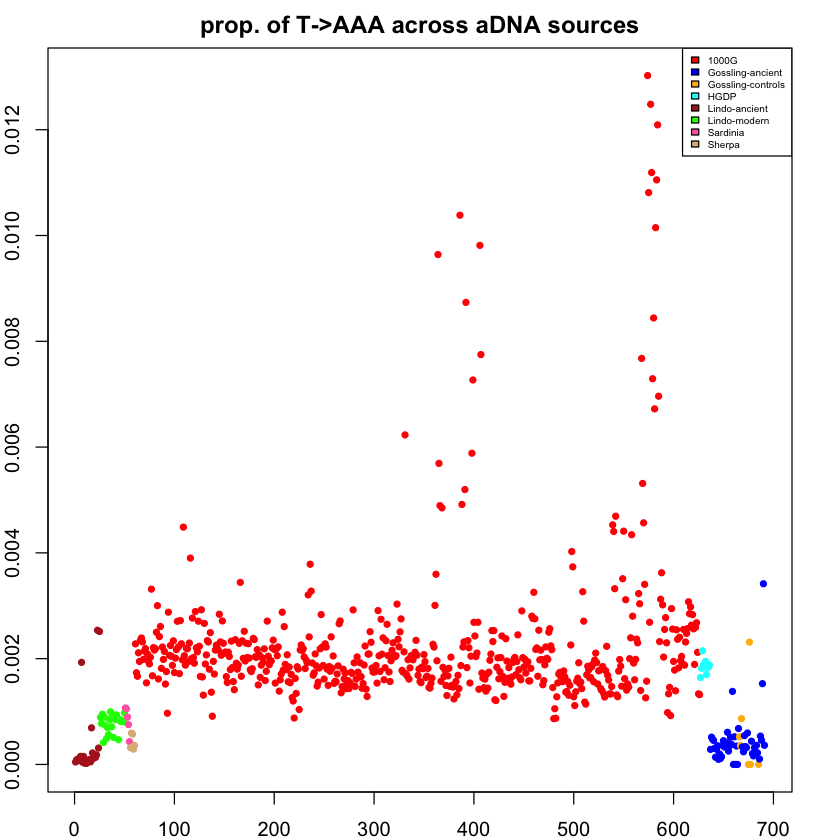

In [7]:
labs <- c(rep("Lindo-ancient", dim(lindoancient_data_filtered)[1]),
          rep("Lindo-modern", dim(lindomoderns_data_filtered)[1]),
          rep("Sardinia", dim(sardinia_data_filtered)[1]),
          rep("Sherpa", dim(sherpa_data_filtered)[1]),
          rep("1000G", dim(thousandg_data_filtered)[1]),
          rep("HGDP", dim(hgdp_data_filtered)[1]))

names <- rownames(gossling_data_filtered);
control_indices <- c(grep("EXN", names), grep("Libneg", names), grep("PCRneg", names))


labs1 <- character();
labs1 <- rep("Gossling-ancient", dim(gossling_data_filtered)[1])
labs1[control_indices] <- "Gossling-controls"

labs <- c(labs, labs1)

cols = c("red","blue","darkgoldenrod1","cyan","firebrick", "green",
         "hotpink","burlywood","darkkhaki","yellow","darkgray","deepskyblue",
         "brown4","darkorchid","magenta", "azure1","azure4")

par(mfrow=c(1,1))
par(mar=c(2,2,2,2))
plot(sig_T_AAA_counts, col=cols[as.numeric(factor(labs))], pch=20, main="prop. of T->AAA across aDNA sources")
legend("topright", legend=levels(factor(labs)),fill=cols[1:length(levels(factor(labs)))], cex=0.5)

## Analyzing AA(T->A)AA patterns 

We here analyze the AA(T->A) AA patterns in the different populations.

In [6]:
sig_T_AAA_counts <- c();
sig_T_AAA_counts <- c(sig_T_AAA_counts, lindoancient_data_filtered[,grep("AAT->AAA", colnames(lindoancient_data_filtered))]/rowSums(lindoancient_data_filtered))
sig_T_AAA_counts <- c(sig_T_AAA_counts, lindomoderns_data_filtered[,grep("AAT->AAA", colnames(lindomoderns_data_filtered))]/rowSums(lindomoderns_data_filtered))
sig_T_AAA_counts <- c(sig_T_AAA_counts, sardinia_data_filtered[,grep("AAT->AAA", colnames(sardinia_data_filtered))]/rowSums(sardinia_data_filtered))
sig_T_AAA_counts <- c(sig_T_AAA_counts, sherpa_data_filtered[,grep("AAT->AAA", colnames(sherpa_data_filtered))]/rowSums(sherpa_data_filtered))
sig_T_AAA_counts <- c(sig_T_AAA_counts, thousandg_data_filtered[,grep("AAT->AAA", colnames(thousandg_data_filtered))]/rowSums(thousandg_data_filtered))
sig_T_AAA_counts <- c(sig_T_AAA_counts, hgdp_data_filtered[,grep("AAT->AAA", colnames(hgdp_data_filtered))]/rowSums(hgdp_data_filtered))
sig_T_AAA_counts <- c(sig_T_AAA_counts, gossling_data_filtered[,grep("AAT->AAA", colnames(gossling_data_filtered))]/rowSums(gossling_data_filtered))

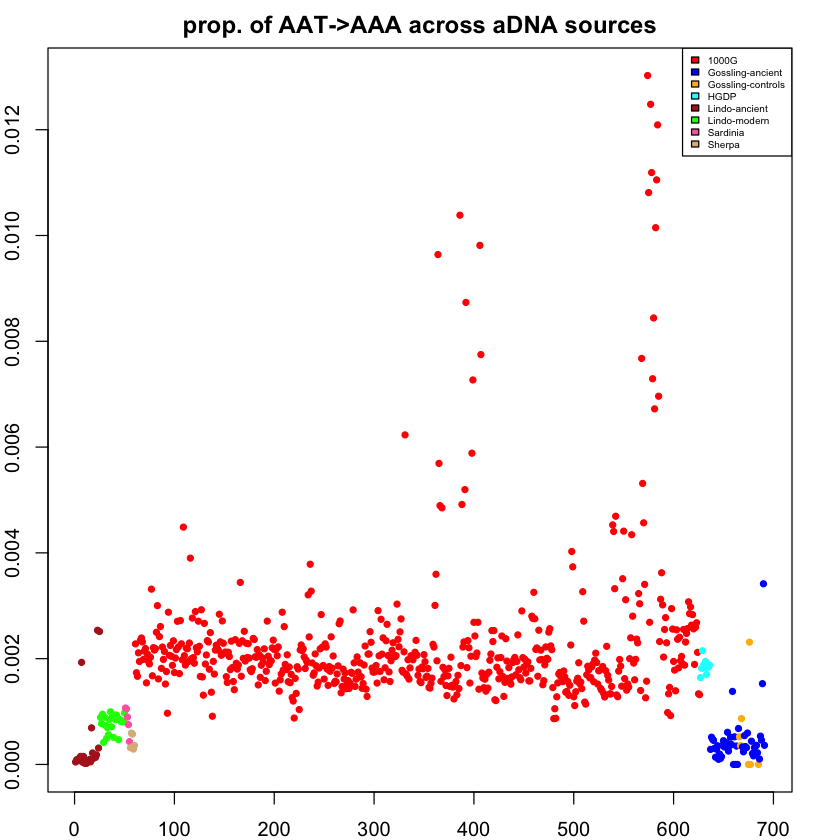

In [8]:
labs <- c(rep("Lindo-ancient", dim(lindoancient_data_filtered)[1]),
          rep("Lindo-modern", dim(lindomoderns_data_filtered)[1]),
          rep("Sardinia", dim(sardinia_data_filtered)[1]),
          rep("Sherpa", dim(sherpa_data_filtered)[1]),
          rep("1000G", dim(thousandg_data_filtered)[1]),
          rep("HGDP", dim(hgdp_data_filtered)[1]))

names <- rownames(gossling_data_filtered);
control_indices <- c(grep("EXN", names), grep("Libneg", names), grep("PCRneg", names))


labs1 <- character();
labs1 <- rep("Gossling-ancient", dim(gossling_data_filtered)[1])
labs1[control_indices] <- "Gossling-controls"

labs <- c(labs, labs1)

cols = c("red","blue","darkgoldenrod1","cyan","firebrick", "green",
         "hotpink","burlywood","darkkhaki","yellow","darkgray","deepskyblue",
         "brown4","darkorchid","magenta", "azure1","azure4")

par(mfrow=c(1,1))
par(mar=c(2,2,2,2))
plot(sig_T_AAA_counts, col=cols[as.numeric(factor(labs))], pch=20, main="prop. of AAT->AAA across aDNA sources")
legend("topright", legend=levels(factor(labs)),fill=cols[1:length(levels(factor(labs)))], cex=0.5)

So it seems a few modern populations in 1000 Genomes samples also showed high frequencies in these signatures, and we were curious what these modern populations were. Next we will ry to find out.

In [14]:
names(which(sig_T_AAA_counts > 0.005))

[1] "HG00641.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30"
 [2] "HG00734.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30"
 [3] "HG00736.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30"
 [4] "HG01047.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30"
 [5] "HG01054.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30"
 [6] "HG01055.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30"
 [7] "HG01066.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30"
 [8] "HG01067.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30"
 [9] "HG01079.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30"
[10] "HG01080.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30"
[11] "NA19660.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"
[12] "NA19661.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"
[13] "NA19675.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"
[14] "NA19676.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"
[15] "NA19679.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"
[16] "NA19681.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"
[17] "NA19682.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"
[18] "NA19684.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"
[19] "NA19685.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"
[20] "NA19716.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"
[21] "NA19717.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"
[22] "NA19719.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"
[23] "NA19720.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30"

Note thatthere is a common trend in that PUR (Puerto Rican) and MXL (Mexican Ancestry) dominate the results and these are both South Ameican ancestry. We do not get any European sample (say GBR) to show that trend as strong. 

Now it could have happened entirely that the patterns we see in these modern samples are totally unrelated to the patterns we saw in John Lindo's data. It could also happen that the patterns are actually genetic in that they occur only in American samples (John Lindo's data were also American samples). So we decided to investigate further into it.

We looked into the VCF files for all the modern samples in the 1000 Genomes and tried to see if we see these two patterns show up in a big way in American or South American samples or not.

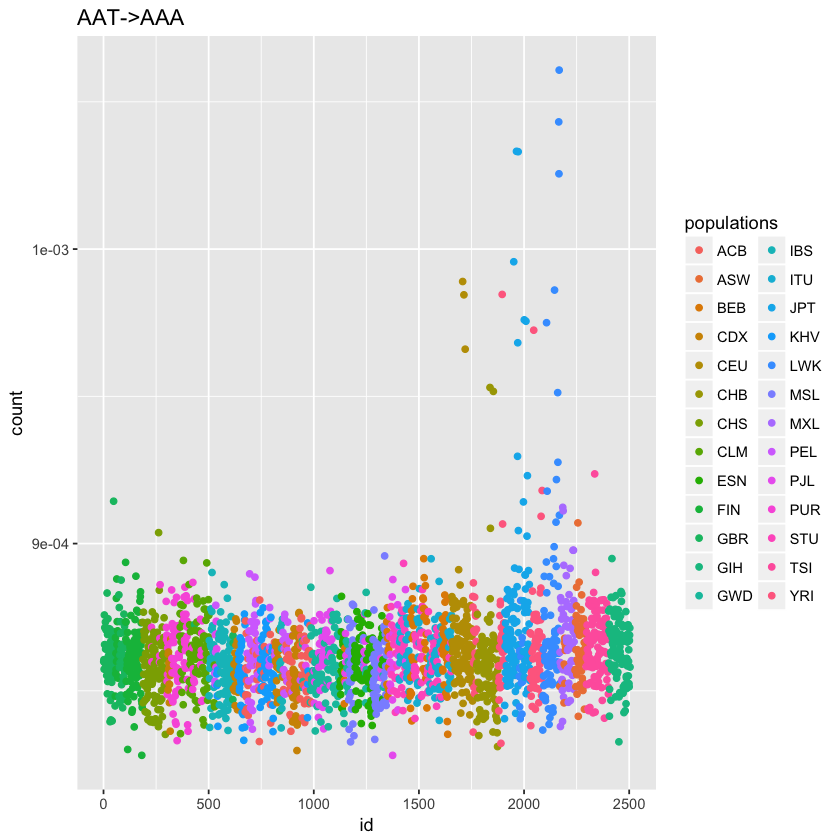

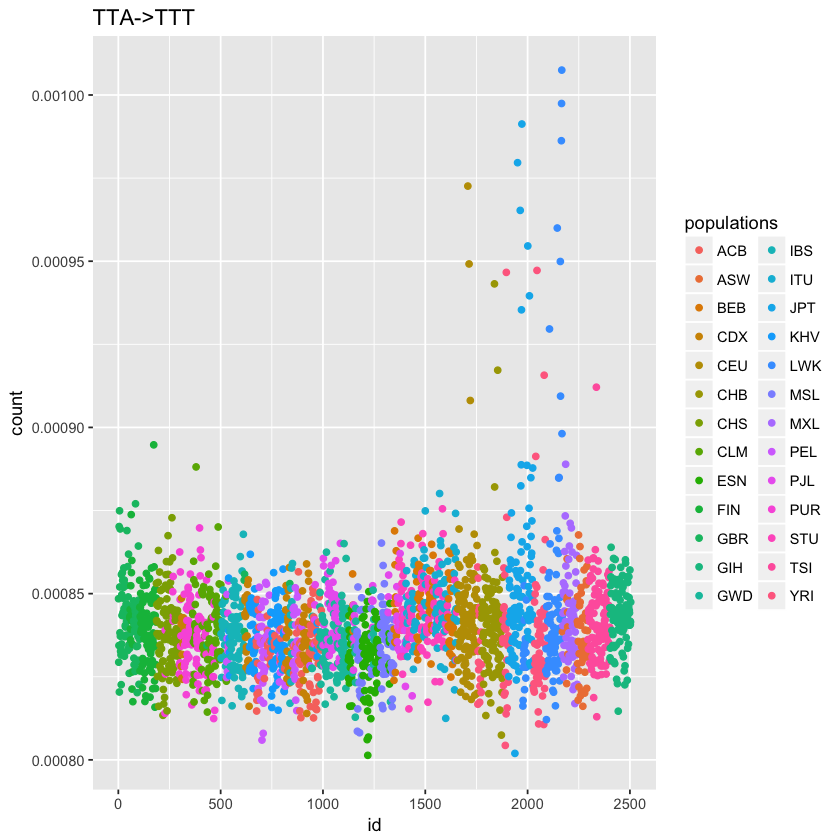

In [19]:

vcf_patterns_data <- get(load("../data/vcf_moderns/vcf_patterns_prop_across_chr.rda"))

#temp <- tbl_df(vcf_patterns_data) %>% filter(sig == "AAT->AAA") %>% select(pop, percentage) %>% group_by(pop) %>% dplyr::summarise(sumprop=mean(percentage))
tbl1 <- tbl_df(vcf_patterns_data) %>% filter(sig == "AAT->AAA") %>% select(pop, percentage) %>% group_by(pop) %>% dplyr::summarise(sumprop=mean(percentage))
tbl2 <- tbl_df(vcf_patterns_data) %>% filter(sig == "TTA->TTT") %>% select(pop, percentage) %>% group_by(pop) %>% dplyr::summarise(sumprop=mean(percentage))
par(mfrow=c(1,2))

library(readxl)
pops = read.table(file = '../data/vcf_moderns/igsr_samples.tsv', sep = '\t', header = TRUE)
pop_ids <- pops$Sample.name
pop_names <- pops$Population.code

populations <- pop_names[match(tbl1$pop, pop_ids)]

dat1 <- data.frame("pop"=populations, "samp"=tbl1$pop, "count"= tbl1$sumprop, "id"=1:dim(tbl1)[1])
dat2 <- data.frame("pop"=populations, "samp"=tbl2$pop, "count"= tbl2$sumprop, "id"=1:dim(tbl2)[1])

par(mfrow=c(1,2))
ggplot2::qplot(id, count, main="AAT->AAA", data=dat1, colour = populations)
ggplot2::qplot(id, count, main="TTA->TTT", data=dat2, colour = populations)

In [22]:
dat1$pop[order(dat1$count, decreasing=TRUE)[1:10]]

[1] LWK LWK JPT JPT LWK JPT CEU LWK YRI CEU
26 Levels: ACB ASW BEB CDX CEU CHB CHS CLM ESN FIN GBR GIH GWD IBS ITU ... YRI

In [23]:
dat2$pop[order(dat2$count, decreasing=TRUE)[1:10]]

[1] LWK LWK JPT LWK JPT CEU JPT LWK JPT LWK
26 Levels: ACB ASW BEB CDX CEU CHB CHS CLM ESN FIN GBR GIH GWD IBS ITU ... YRI

It seems LWK (Kenya) and JPT (Japanense) samples showed higher amounts of these patterns in the VCF files, but 
the South American bias was not seen. However, these LWK and JPT samples were anot among the 500 samples of moderns we
studied in our data, which were primarily European and American. In order to make a fair comparison, we filter out 
VCF results exactly for those samples that we considered for our signature data comparison.
    
We see next how the pattern frequencies from VCF files look when focussed on only those samples.

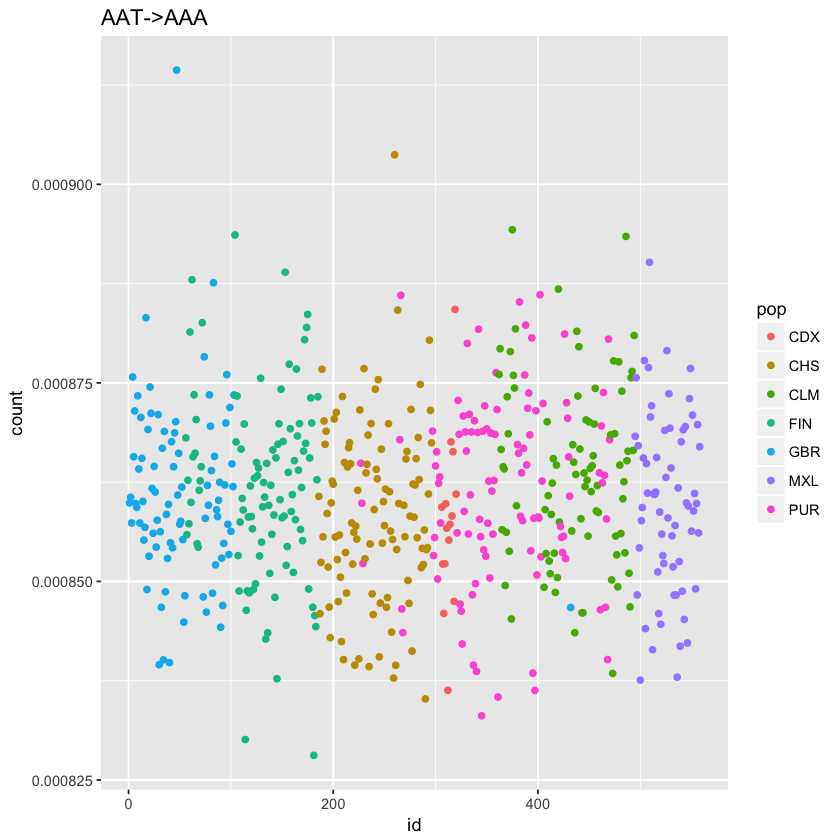

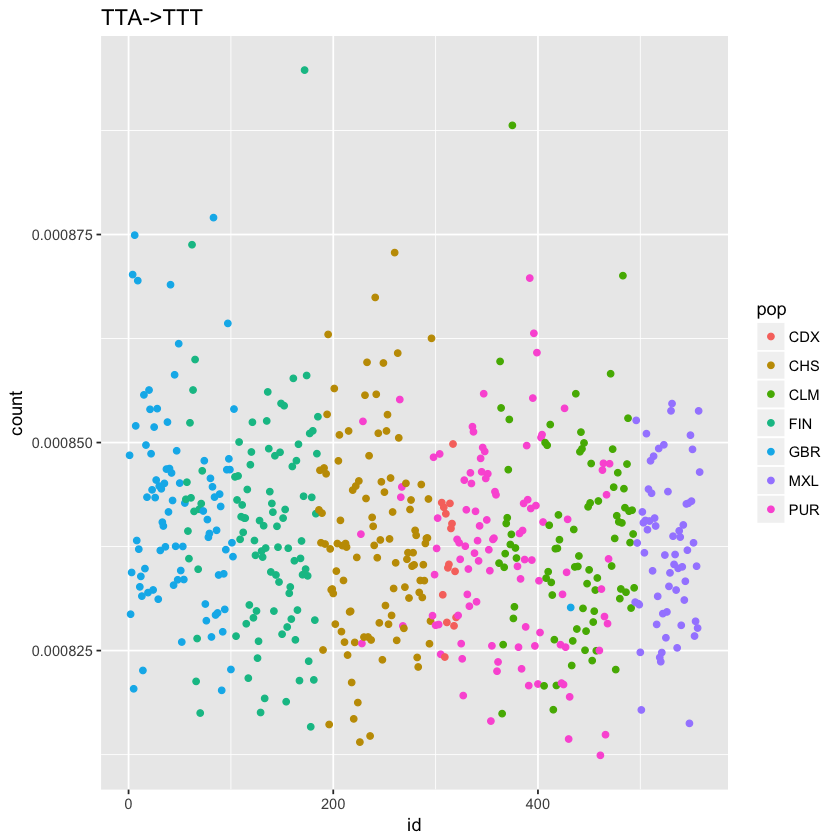

In [24]:
thousandg_data <- get(load("../processed_data/1000Gmoderns-counts-table.rda"));
signature_pops_thousandg <- as.character(sapply(rownames(thousandg_data), function(x) strsplit(x, "[.]")[[1]][1]))
pops_sig = as.character(sapply(rownames(thousandg_data), function(x) strsplit(x, "[.]")[[1]][5]))

pops4 = pops[match(signature_pops_thousandg, pops$Sample.name), ];
pop_ids2 <- pops4$Sample.name
pop_names2 <- pops_sig

indices <- which(is.na(match(pops4$Sample.name, tbl1$pop)))
tbl12 = tbl1[which(!is.na(match(pops4$Sample.name, tbl1$pop))),]
tbl22 = tbl2[which(!is.na(match(pops4$Sample.name, tbl2$pop))),]
populations2 <- pop_names2[-indices]

dat12 = data.frame("pop"=populations2, "samp"=tbl12$pop, "count"= tbl12$sumprop, "id"=1:dim(tbl12)[1])
dat22 = data.frame("pop"=populations2, "samp"=tbl22$pop, "count"= tbl22$sumprop, "id"=1:dim(tbl22)[1])

par(mfrow=c(1,2))
ggplot2::qplot(id, count, main="AAT->AAA", data=dat12, colour = pop)
ggplot2::qplot(id, count, main="TTA->TTT", data=dat22, colour = pop)

## Summary

We tried to go deep with the (A->T) flanked by T and (T->A) flanked by A pattern that we saw in John Lindo et al data. Our initial results suggested there might be a genetic relation in that some South American samples showed this pattern (PUR, MXL) [We also checked that CLM, Colombian samples also showed this but that data has not been included here]. However, this could be entirely due to two different reasons, or could both be library prep issues. To answer the question if this pattern is genetic or not, we tried to trace this signature in its evolutionary path. From the VCF files, when we looked at the proportion of these signatures against all signatures for all populations, South American samples did not stand out in displaying high frequencies of these patterns in VCF, and of the 1000 genome populations, some LWK and JPT poplations showed more of this pattern.

Since we could not connect this to VCF, we do not think this is genetic. So, it may be library prep issues. We found these patterns mainly occurring towards the ends, which might be a strong indicator of that.

In [25]:
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: OS X 10.12 (Sierra)

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] readxl_0.1.1     plyr_1.8.4       dplyr_0.5-1      gridBase_0.4-7  
[5] maptpx_1.9-3     CountClust_0.1.2 ggplot2_2.2.1    aRchaic_0.99.0  

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.8         tools_3.3.1         boot_1.3-18        
 [4] digest_0.6.11       uuid_0.1-2          nlme_3.1-128       
 [7] jsonlite_1.2        evaluate_0.10       tibble_1.2         
[10] gtable_0.2.0        lattice_0.20-34     mgcv_1.8-16        
[13] Matrix_1.2-7.1      DBI_0.5-1           IRdisplay_0.4.4    
[16] parallel_3.3.1      IRkernel_0.7.1      gridExtra_2.2.1    
[19] cluster_2.0.5       repr_0.10           stringr_1.1.0      
[22] gtools_3.5.0        stats4_3.